In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_ = data[['sepal length (cm)','sepal width (cm)']]

In [6]:
#iris_.insert(loc=len(iris.columns), column='varity',value=None)

In [8]:
iris_c = iris.target

In [20]:
iris_c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_, iris_c, test_size=0.20)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
lda=LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [16]:
lda.predict(X_test)

array([1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 2])

In [18]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [19]:
result

,0,1
0,2,1
1,0,0
2,2,2
3,2,2
4,0,0
5,2,2
6,2,2
7,2,1
8,0,0
9,1,1


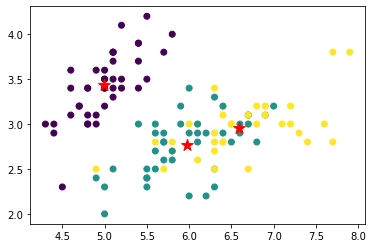

In [24]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

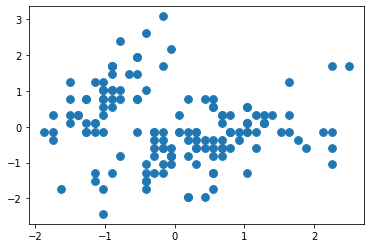

In [32]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=60)

In [31]:
X_scaled = scaler.fit_transform(iris_)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
from sklearn.cluster import KMeans

In [37]:
k_inertia = []
ks = range(2, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

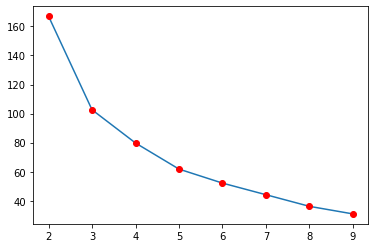

In [39]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#видим, что примерно нам подходит 4-5 кластеров

In [51]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 4, 2, 2, 0, 4, 0, 4, 4, 2, 4, 2, 2, 0,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 2, 2, 0, 0, 4,
       2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 0, 2, 0, 2, 0, 0, 4, 0, 2, 0,
       0, 2, 0, 4, 2, 0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [53]:
kmeans4 = KMeans(n_clusters=5)
clusters4 = kmeans.fit_predict(X_scaled)
clusters4

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2,
       3, 2, 3, 2, 3, 2, 1, 1, 1, 4, 0, 0, 1, 4, 1, 4, 4, 0, 4, 0, 0, 1,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 0, 4, 4, 4, 0, 0, 0, 1, 1, 4,
       0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 1, 4, 1, 0, 1,
       1, 0, 1, 4, 0, 1, 1, 1, 1, 4, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

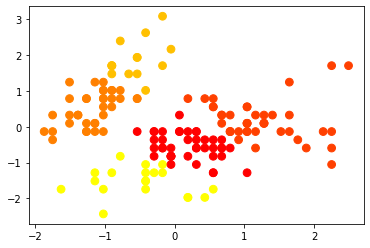

In [54]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters4, s=60)

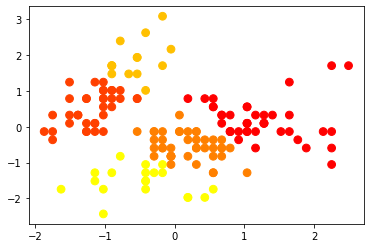

In [55]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [56]:
#Глядя на две визуализации можно предположить, что нам подходит 4 кластера